## Laboratorio 2 - Series de Tiempo LSTM
#### Sebastian Juarez - 21471

### Analisis Exploratorio

Inicio de la serie: 2021-01-01 00:00:00
Fin de la serie: 2025-07-13 00:00:00
Frecuencia aproximada: Diaria


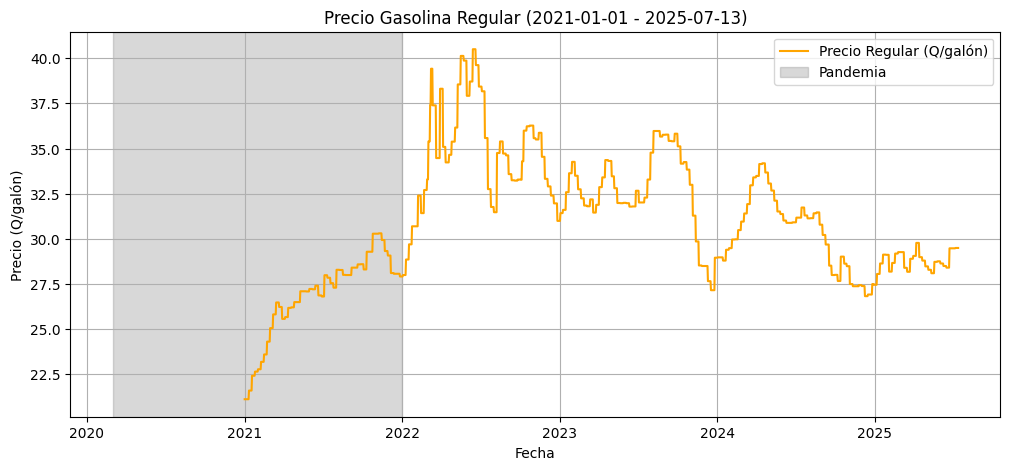

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "Data/Precios-Promedio-Nacionales-Diarios-2025-1.xlsx"
precios_df = pd.read_excel(file_path)

precios_clean = precios_df[['FECHA', 'Regular']].copy()

precios_clean = precios_clean[pd.to_numeric(precios_clean['Regular'], errors='coerce').notna()]

precios_clean['FECHA'] = pd.to_datetime(precios_clean['FECHA'])
precios_clean['Regular'] = precios_clean['Regular'].astype(float)

inicio = precios_clean['FECHA'].min()
fin = precios_clean['FECHA'].max()
print(f"Inicio de la serie: {inicio}")
print(f"Fin de la serie: {fin}")
print(f"Frecuencia aproximada: Diaria")

plt.figure(figsize=(12,5))
plt.plot(precios_clean['FECHA'], precios_clean['Regular'], color='orange', label='Precio Regular (Q/galón)')
plt.axvspan(pd.to_datetime("2020-03-01"), pd.to_datetime("2021-12-31"), 
            color='gray', alpha=0.3, label='Pandemia')

plt.title(f'Precio Gasolina Regular ({inicio.date()} - {fin.date()})')
plt.xlabel('Fecha')
plt.ylabel('Precio (Q/galón)')
plt.legend()
plt.grid(True)
plt.show()


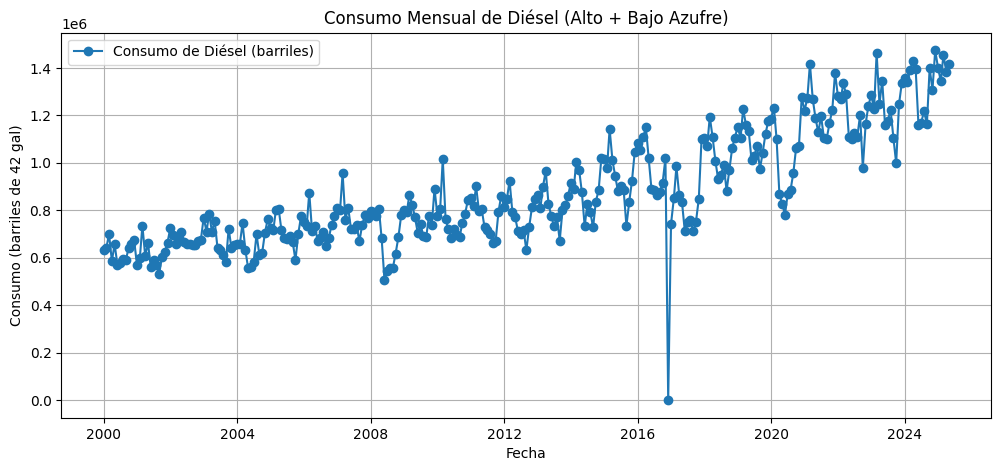

Inicio de la serie: 2000-01-01
Fin de la serie: 2025-05-01
Frecuencia: Mensual


In [ ]:
consumo_2024 = pd.read_excel("Data/CONSUMO-HIDROCARBUROS-2024-12.xlsx", header=None)
consumo_2025 = pd.read_excel("Data/VENTAS-HIDROCARBUROS-2025-05.xlsx", header=None)

fila_header_2024 = consumo_2024[0].astype(str).str.contains("Fecha", case=False, na=False)
fila_header_2025 = consumo_2025[0].astype(str).str.contains("Fecha", case=False, na=False)

header_index_2024 = consumo_2024[fila_header_2024].index[0]
header_index_2025 = consumo_2025[fila_header_2025].index[0]

consumo_2024 = pd.read_excel("Data/CONSUMO-HIDROCARBUROS-2024-12.xlsx", header=header_index_2024)
consumo_2025 = pd.read_excel("Data/VENTAS-HIDROCARBUROS-2025-05.xlsx", header=header_index_2025)

consumo_2024 = consumo_2024[pd.to_datetime(consumo_2024['Fecha'], errors='coerce').notna()].copy()

consumo_2024['Fecha'] = pd.to_datetime(consumo_2024['Fecha'])

consumo_2024['Diesel_Total'] = consumo_2024.apply(
    lambda row: row['Diesel alto azufre'] if row['Fecha'] < pd.Timestamp('2016-12-01') else row['Diesel bajo azufre'],
    axis=1
)

consumo_2025 = consumo_2025[['Fecha', 'Diesel bajo azufre']].dropna()
consumo_2025['Fecha'] = pd.to_datetime(consumo_2025['Fecha'])
consumo_2025.rename(columns={'Diesel bajo azufre': 'Diesel_Total'}, inplace=True)

consumo_diesel = pd.concat([
    consumo_2024[['Fecha', 'Diesel_Total']],
    consumo_2025[['Fecha', 'Diesel_Total']]
])
consumo_diesel = consumo_diesel.sort_values(by='Fecha').reset_index(drop=True)

# --- GRAFICAR ---
plt.figure(figsize=(12,5))
plt.plot(consumo_diesel['Fecha'], consumo_diesel['Diesel_Total'], marker='o', label='Consumo de Diésel (barriles)')
plt.title('Consumo Mensual de Diésel (Alto + Bajo Azufre)')
plt.xlabel('Fecha')
plt.ylabel('Consumo (barriles de 42 gal)')
plt.legend()
plt.grid(True)
plt.show()

# --- INFORMACIÓN BÁSICA ---
print(f"Inicio de la serie: {consumo_diesel['Fecha'].min().date()}")
print(f"Fin de la serie: {consumo_diesel['Fecha'].max().date()}")
print(f"Frecuencia: Mensual")


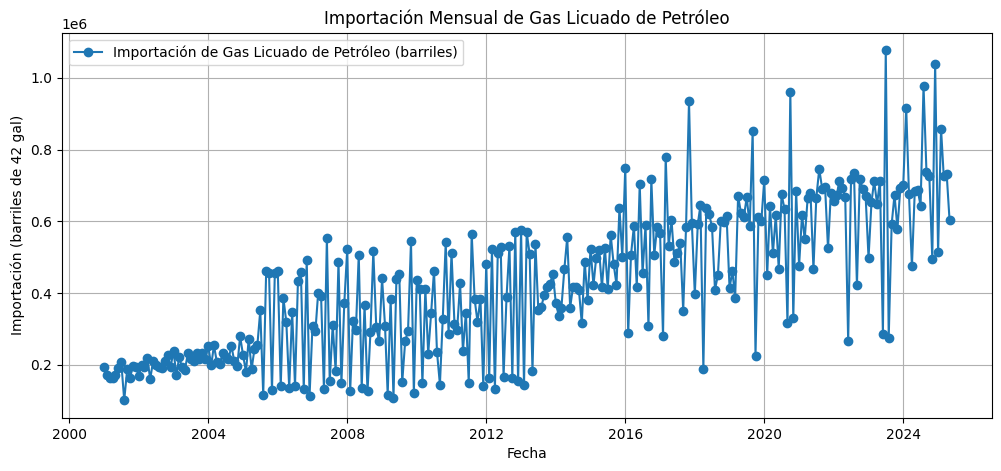

Inicio de la serie: 2001-01-01
Fin de la serie: 2025-05-01
Frecuencia: Mensual


In [ ]:
importacion_2024 = pd.read_excel("Data/IMPORTACION-HIDROCARBUROS-VOLUMEN-2024-12.xlsx", header=None)
importacion_2025 = pd.read_excel("Data/IMPORTACION-HIDROCARBUROS-VOLUMEN-2025-05.xlsx", header=None)

fila_header_2024 = importacion_2024[0].astype(str).str.contains("Fecha", case=False, na=False)
fila_header_2025 = importacion_2025[0].astype(str).str.contains("Fecha", case=False, na=False)

header_index_2024 = importacion_2024[fila_header_2024].index[0]
header_index_2025 = importacion_2025[fila_header_2025].index[0]

importacion_2024 = pd.read_excel("Data/IMPORTACION-HIDROCARBUROS-VOLUMEN-2024-12.xlsx", header=header_index_2024)
importacion_2025 = pd.read_excel("Data/IMPORTACION-HIDROCARBUROS-VOLUMEN-2025-05.xlsx", header=header_index_2025)

importacion_2024.columns = [col.strip().lower() for col in importacion_2024.columns]
importacion_2025.columns = [col.strip().lower() for col in importacion_2025.columns]

importacion_2024 = importacion_2024[['fecha', 'gas licuado de petróleo']].dropna()
importacion_2025 = importacion_2025[['fecha', 'gas licuado de petróleo']].dropna()

importacion_2024['fecha'] = pd.to_datetime(importacion_2024['fecha'])
importacion_2025['fecha'] = pd.to_datetime(importacion_2025['fecha'])

importacion_gas = pd.concat([importacion_2024, importacion_2025])
importacion_gas = importacion_gas.sort_values(by='fecha').reset_index(drop=True)

plt.figure(figsize=(12,5))
plt.plot(importacion_gas['fecha'], importacion_gas['gas licuado de petróleo'], marker='o', label='Importación de Gas Licuado de Petróleo (barriles)')
plt.title('Importación Mensual de Gas Licuado de Petróleo')
plt.xlabel('Fecha')
plt.ylabel('Importación (barriles de 42 gal)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Inicio de la serie: {importacion_gas['fecha'].min().date()}")
print(f"Fin de la serie: {importacion_gas['fecha'].max().date()}")
print(f"Frecuencia: Mensual")


<Figure size 1200x800 with 0 Axes>

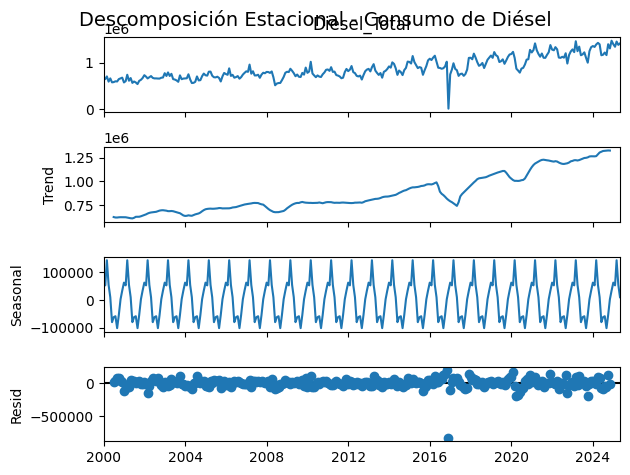

<Figure size 1200x800 with 0 Axes>

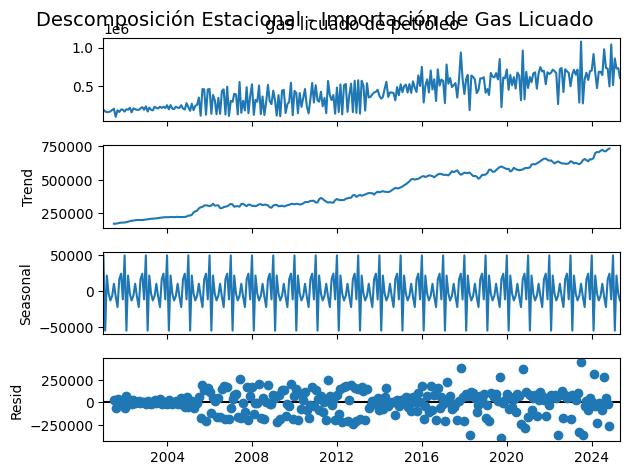

<Figure size 1200x800 with 0 Axes>

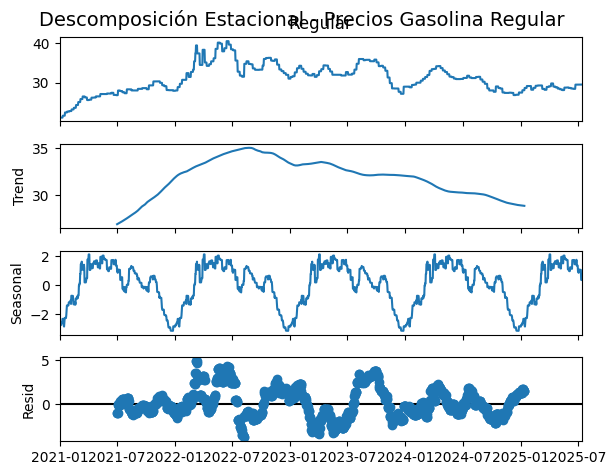

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

file_path = "Data/Precios-Promedio-Nacionales-Diarios-2025-1.xlsx"
precios_df = pd.read_excel(file_path)
precios_clean = precios_df[['FECHA', 'Regular']].copy()
precios_clean = precios_clean[pd.to_numeric(precios_clean['Regular'], errors='coerce').notna()]
precios_clean['FECHA'] = pd.to_datetime(precios_clean['FECHA'])
precios_clean['Regular'] = precios_clean['Regular'].astype(float)

# --- FUNCIÓN AUXILIAR ---
def plot_seasonality(df, date_col, value_col, freq, title):
    """
    Descompone una serie de tiempo y grafica tendencia, estacionalidad y residuo.
    df: DataFrame con columnas [date_col, value_col]
    freq: frecuencia (ej. 'M' mensual, 'D' diaria)
    """
    series = df.set_index(date_col)[value_col]
    # Crear un índice completo según la frecuencia
    if freq == 'M':
        full_idx = pd.date_range(series.index.min(), series.index.max(), freq='MS')
        period = 12
    elif freq == 'D':
        full_idx = pd.date_range(series.index.min(), series.index.max(), freq='D')
        period = 365
    else:
        raise ValueError("Frecuencia no soportada")
    series = series.reindex(full_idx)
    series = series.ffill().bfill()
    decomposition = seasonal_decompose(series, model='additive', period=period)

    plt.figure(figsize=(12, 8))
    decomposition.plot()
    plt.suptitle(title, fontsize=14)
    plt.show()

# ESTACIONALIDAD: CONSUMO DE DIÉSEL
plot_seasonality(consumo_diesel, 'Fecha', 'Diesel_Total', freq='M',
                 title='Descomposición Estacional - Consumo de Diésel')
# ESTACIONALIDAD: IMPORTACIÓN DE GAS LICUADO
plot_seasonality(importacion_gas, 'fecha', 'gas licuado de petróleo', freq='M',
                 title='Descomposición Estacional - Importación de Gas Licuado')

# ESTACIONALIDAD: PRECIOS DE GASOLINA REGULAR
plot_seasonality(precios_clean, 'FECHA', 'Regular', freq='D',
                 title='Descomposición Estacional - Precios Gasolina Regular')


## Modelos de series de Tiempo con LSTM

### Preparación

In [ ]:

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# PREPARACION DE LOS DATOS
data = precios_clean[['FECHA', 'Regular']].copy()
data = data.set_index('FECHA')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_sequences(dataset, look_back=60):
    X, y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i-look_back:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

look_back = 60
X, y = create_sequences(scaled_data, look_back)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Datos de entrenamiento y prueba
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


### Modelo 1 - LSTM simple

Epoch 1/20


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0621 - val_loss: 0.0036
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0022 - val_loss: 9.0484e-04
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0016 - val_loss: 6.6588e-04
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0012 - val_loss: 3.9921e-04
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0013 - val_loss: 6.7817e-04
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0012 - val_loss: 3.4712e-04
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0012 - val_loss: 3.1845e-04
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0011 - val_loss: 3.3500e-04
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0013 - val_loss: 3.3704e-04
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0010 - val_loss: 4.2572e-04
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.0136e-04 - val_loss: 2.9017e-04
Epoch 12/20
40/40 ━━━━━━━━━━━━

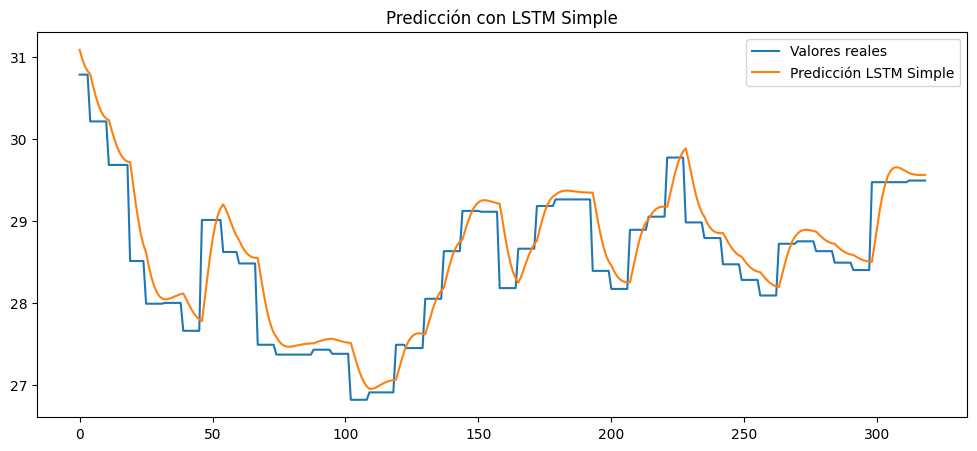

In [ ]:
# LSTM SIMPLE
model_simple = Sequential()
model_simple.add(LSTM(50, return_sequences=False, input_shape=(look_back, 1)))
model_simple.add(Dense(1))

model_simple.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history_simple = model_simple.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predicciones
pred_simple = model_simple.predict(X_test)
pred_simple = scaler.inverse_transform(pred_simple)
real_values = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12,5))
plt.plot(real_values, label='Valores reales')
plt.plot(pred_simple, label='Predicción LSTM Simple')
plt.legend()
plt.title('Predicción con LSTM Simple')
plt.show()


### Modelo 2 - LSTM con capas y dropout

Epoch 1/30


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0837 - val_loss: 0.0019
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0035 - val_loss: 7.7074e-04
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0028 - val_loss: 8.3223e-04
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0022 - val_loss: 5.7150e-04
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0022 - val_loss: 7.0872e-04
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0023 - val_loss: 8.7885e-04
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0020 - val_loss: 5.5787e-04
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0020 - val_loss: 4.3199e-04
Epoch 9/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0018 - val_loss: 5.4708e-04
Epoch 10/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0017 - val_loss: 6.3322e-04
Epoch 11/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0018 - val_loss: 4.2678e-04
Epoch 12/30
40/40 ━━━━━━━━━━━━━━━━

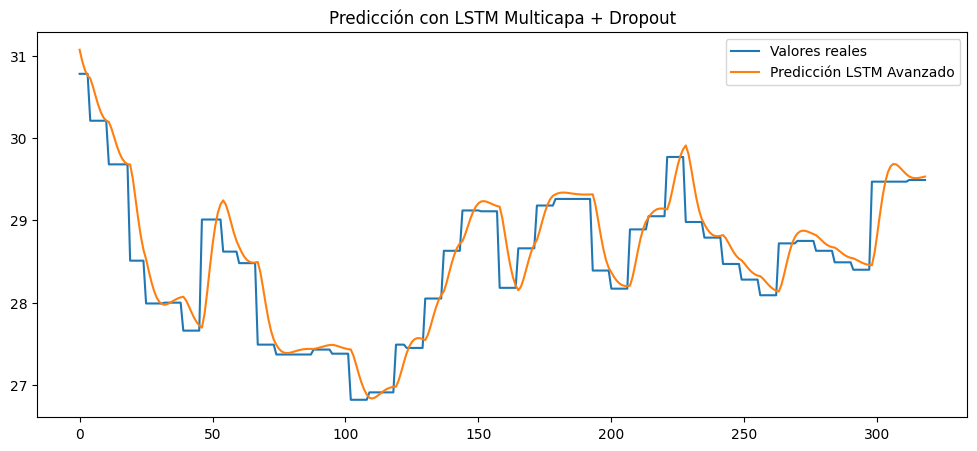

In [ ]:
# LSTM MULTICAPA y DROPOUT
model_advanced = Sequential()
model_advanced.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model_advanced.add(Dropout(0.2))
model_advanced.add(LSTM(50, return_sequences=False))
model_advanced.add(Dense(1))

model_advanced.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history_advanced = model_advanced.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predicciones
pred_advanced = model_advanced.predict(X_test)
pred_advanced = scaler.inverse_transform(pred_advanced)

plt.figure(figsize=(12,5))
plt.plot(real_values, label='Valores reales')
plt.plot(pred_advanced, label='Predicción LSTM Avanzado')
plt.legend()
plt.title('Predicción con LSTM Multicapa + Dropout')
plt.show()
